<a href="https://colab.research.google.com/github/Yohanes213/Hamoye/blob/main/Hamoye_2_Machine_Learning_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay



In [105]:
df = pd.read_csv('/content/Data_for_UCI_named.csv')

In [106]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [107]:
df.drop(columns=['stab'], inplace =True)

In [108]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


In [123]:
le = LabelEncoder()

df['stabf'] = le.fit_transform(df['stabf'])

In [124]:
X = df.drop(columns=['stabf'])
y = df['stabf']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [126]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train= np.array(y_train)
y_test= np.array(y_test)

In [127]:
model_rf = RandomForestClassifier(random_state=1)

model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

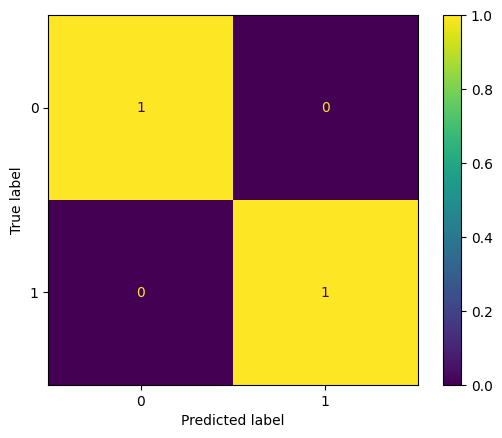

In [56]:
# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(model_rf, X_train_scaled, y_train, normalize='true')

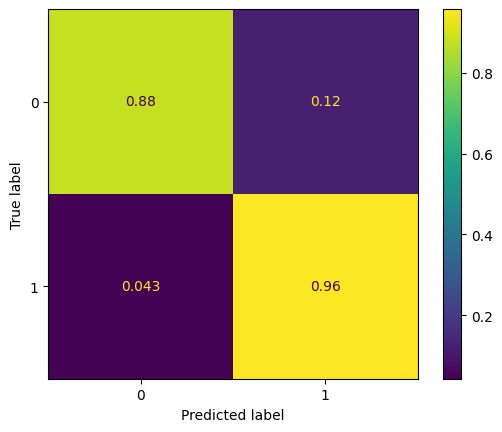

In [57]:
# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(model_rf, X_test_scaled, y_test, normalize='true')

In [128]:
round(accuracy_score(model_rf.predict(X_test_scaled), y_test),4)

0.929

In [129]:
xgb = XGBClassifier(random_state=1)

xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

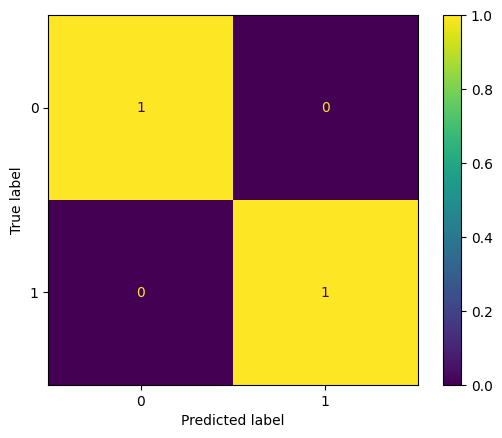

In [130]:
# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(xgb, X_train_scaled, y_train, normalize='true')

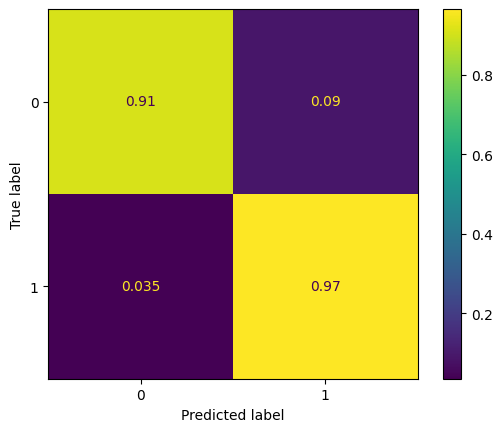

In [131]:
# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test, normalize='true')

In [132]:
round(accuracy_score(xgb.predict(X_test_scaled), y_test),4)

0.9455

In [133]:
lgb = LGBMClassifier()

lgb.fit(X_train_scaled, y_train)

LGBMClassifier()

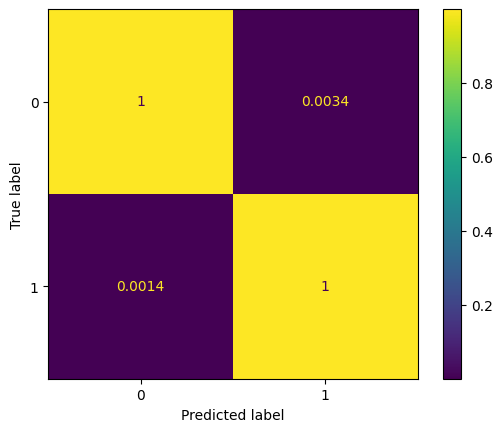

In [134]:
# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(lgb, X_train_scaled, y_train, normalize='true')

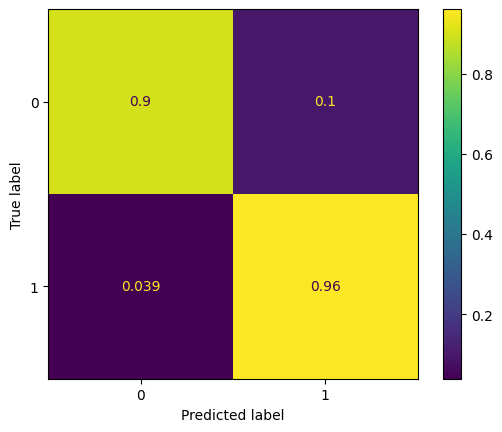

In [135]:
# Get confusion matrix for Gradient Boosting Classifier
ConfusionMatrixDisplay.from_estimator(lgb, X_test_scaled, y_test, normalize='true')

In [136]:
round(accuracy_score(lgb.predict(X_test_scaled), y_test),4)

0.9395

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import ExtraTreeClassifier

In [138]:
et = ExtraTreeClassifier()

In [139]:
param_dist = {'max_features': ['auto' 'log2' , None],
              'min_samples_split': [2,5,7],
              'min_samples_leaf': [4,6,8]}
              #'max_depth': [100,300,500, 1000]}

In [ ]:
search = RandomizedSearchCV(estimator = et ,param_distributions = param_dist, n_iter = 10, cv = 5, n_jobs=-1, verbose=1, scoring='accuracy', random_state=1)
search.fit(X_train_scaled, y_train)

In [141]:
print('Best hyperparameters:', search.best_params_)
print('Best score:', search.best_score_)

Best hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best score: 0.8342499999999999


In [146]:
ett = ExtraTreeClassifier(min_samples_split= 2, min_samples_leaf= 8, max_features= None)

ett.fit(X_train_scaled, y_train)

ExtraTreeClassifier(max_features=None, min_samples_leaf=8)

In [148]:
ft = pd.DataFrame({
    'feat'  :ett.feature_importances_
}, index= X_train.columns).sort_values(by= 'feat')

In [149]:
ft

,feat
p4,0.003779
p1,0.005110
p3,0.006741
p2,0.007677
g2,0.091095
g3,0.092151
g1,0.096699
g4,0.121848
tau4,0.132796
tau3,0.135514
